#### Assignment 1 : Neural Networks
#### Advanced Machine Learning
#### Nithin Kumar Chinthakindi


In [1]:
from tensorflow.keras.datasets import imdb
(imdb_train_data, imdb_train_labels), (imdb_test_data, imdb_test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
imdb_train_labels[0]

1

In [3]:
max([max(sequence) for sequence in imdb_train_data])
###############################################################

9999

In [4]:
k_word_index = imdb.get_word_index()
k_reverse_word_index = dict(
    [(value, key) for (key, value) in k_word_index.items()])
decoded_review = " ".join(
    [k_reverse_word_index.get(i - 3, "?") for i in imdb_train_data[0]])
###############################################################

1641221/1641221 [==============================] - 0s 0us/step


In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
k_x_train = vectorize_sequences(imdb_train_data)
k_x_test = vectorize_sequences(imdb_test_data)

In [6]:
k_x_train[0]
###############################################################

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
k_y_train = np.asarray(imdb_train_labels).astype("float32")
k_y_test = np.asarray(imdb_test_labels).astype("float32")

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [9]:
model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])
###############################################################

*italicized text*### Confirming the Method

In [10]:
x_val = k_x_train[:10000]
partial_x_train = k_x_train[10000:]
y_val = k_y_train[:10000]
partial_y_train = k_y_train[10000:]

In [11]:
## model planned to train with 20 epoch with batch size of 256

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/20
59/59 [==============================] - 3s 38ms/step - loss: 0.1217 - accuracy: 0.8361 - val_loss: 0.0843 - val_accuracy: 0.8859
Epoch 2/20
59/59 [==============================] - 2s 27ms/step - loss: 0.0494 - accuracy: 0.9375 - val_loss: 0.0907 - val_accuracy: 0.8791
Epoch 3/20
59/59 [==============================] - 1s 22ms/step - loss: 0.0299 - accuracy: 0.9656 - val_loss: 0.0997 - val_accuracy: 0.8723
Epoch 4/20
59/59 [==============================] - 2s 37ms/step - loss: 0.0244 - accuracy: 0.9719 - val_loss: 0.1108 - val_accuracy: 0.8659
Epoch 5/20
59/59 [==============================] - 2s 29ms/step - loss: 0.0219 - accuracy: 0.9752 - val_loss: 0.1143 - val_accuracy: 0.8675
Epoch 6/20
59/59 [==============================] - 1s 22ms/step - loss: 0.0196 - accuracy: 0.9783 - val_loss: 0.1168 - val_accuracy: 0.8633
Epoch 7/20
59/59 [==============================] - 1s 22ms/step - loss: 0.0171 - accuracy: 0.9809 - val_loss: 0.1152 - val_accuracy: 0.8676
Epoch 8/20
59

In [12]:
k_history_dict = history.history
k_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting the Train and Validation loss

```
# This is formatted as code
```

> Add blockquote



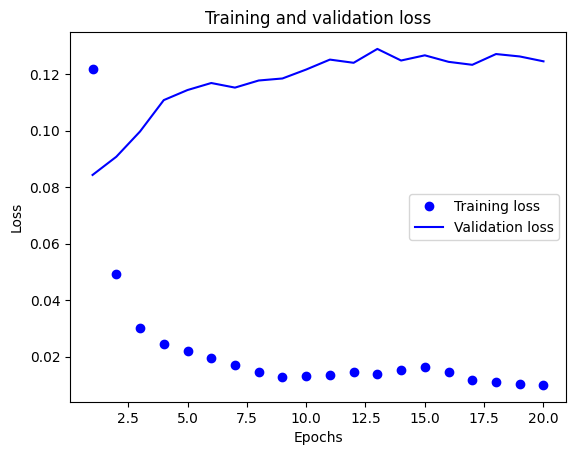

In [14]:
import matplotlib.pyplot as plt
k_history_dict = history.history
loss_values = k_history_dict["loss"]
val_loss_values = k_history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

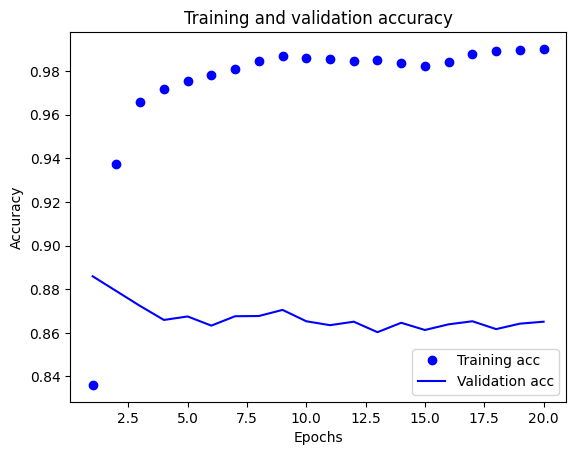

In [15]:
plt.clf()
acc = k_history_dict["accuracy"]
val_acc = k_history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [16]:
results = model.evaluate(k_x_test, k_y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.1385 - accuracy: 0.8514


In [17]:
results

[0.1385454386472702, 0.8514400124549866]

#### Combining all code together along with dropout layer

Epoch 1/20
59/59 [==============================] - 3s 37ms/step - loss: 1.4700 - accuracy: 0.7898 - val_loss: 1.1347 - val_accuracy: 0.8804
Epoch 2/20
59/59 [==============================] - 2s 28ms/step - loss: 0.9102 - accuracy: 0.9030 - val_loss: 0.6962 - val_accuracy: 0.8870
Epoch 3/20
59/59 [==============================] - 2s 27ms/step - loss: 0.5173 - accuracy: 0.9318 - val_loss: 0.3834 - val_accuracy: 0.8876
Epoch 4/20
59/59 [==============================] - 2s 36ms/step - loss: 0.2572 - accuracy: 0.9452 - val_loss: 0.1985 - val_accuracy: 0.8855
Epoch 5/20
59/59 [==============================] - 1s 23ms/step - loss: 0.1220 - accuracy: 0.9554 - val_loss: 0.1288 - val_accuracy: 0.8872
Epoch 6/20
59/59 [==============================] - 1s 22ms/step - loss: 0.0852 - accuracy: 0.9620 - val_loss: 0.1176 - val_accuracy: 0.8859
Epoch 7/20
59/59 [==============================] - 2s 28ms/step - loss: 0.0717 - accuracy: 0.9683 - val_loss: 0.1133 - val_accuracy: 0.8842
Epoch 8/20
59

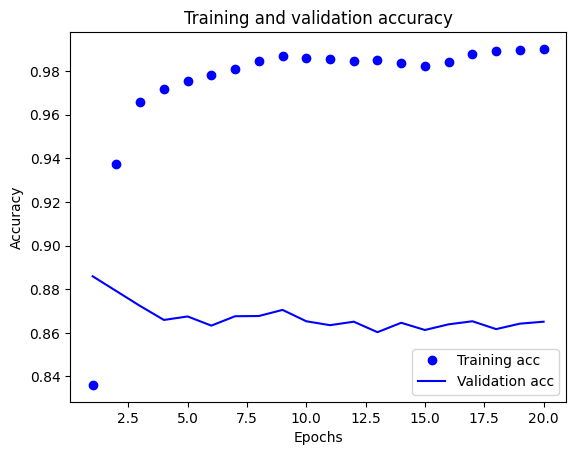

782/782 [==============================] - 2s 2ms/step - loss: 0.1231 - accuracy: 0.8624


[0.12310542166233063, 0.8623999953269958]

In [18]:
## Libraries required for setting up an environment

#####################################
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import regularizers
#####################################

# Neural network implementation using 3 layered approach with a single dropout layer
#######################################
model = keras.Sequential()
model.add(Dense(32,activation='tanh'))
model.add(Dropout(0.5))
#kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01))
model.add(Dense(32,activation='tanh',kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
########################################

# Here for compilation we used optimizer "adagrad", mean squared error loss and accuracy metrics
########################################
model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])
########################################

## splitting the data
#######################################
x_val = k_x_train[:10000]
partial_x_train = k_x_train[10000:]
y_val = k_y_train[:10000]
partial_y_train = k_y_train[10000:]
#######################################

# Train a neural network
#####################################################
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))
#####################################################

# plotting the Training and Validation accuracy
####################################################
plt.clf()
acc = k_history_dict["accuracy"]
val_acc = k_history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
####################################################


# Evaluating the results
results = model.evaluate(k_x_test, k_y_test)
results


#### **Summary of Three-Layered Neural Network for IMDB Data:**

### Library Imports
To set up our neural network, we gathered the necessary libraries. Based on my research, TensorFlow has robust support and implementation, making it a preferable choice over other deep learning libraries like PyTorch.

**List of Imports:**
```python
from tensorflow import keras  
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout
```

- **Keras**: A high-level API of TensorFlow 2, Keras provides a simple and powerful interface for solving machine learning problems, with a focus on modern deep learning.
- **Layers and Models**: The main data structures in Keras. The most basic model type is the Sequential model, which is a linear stack of layers.
- **Dense**: Represents the number of hidden units in the neural network.
- **Dropout**: Refers to the removal of connections between inputs or hidden layer inputs, used to prevent overfitting.

### Designing the Neural Network Layers
We designed the neural network layers as follows:
```python
model = keras.Sequential()
model.add(Dense(32, activation='tanh'))
```
Using the `.add` function, we can easily stack layers. Here, 32 is the number of hidden units, and the activation function used is `tanh`.

### Neural Network Structure
1. **Input Layer**: Provides vector representation of IMDB data.
2. **Hidden Layers**: Contains the number of dense units. We can stack as many layers as needed.
3. **Output Layer**: Preferably has 1 dense unit.

For this task, I implemented a three-layered approach as required:
```python
model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
```
The model is initialized as sequential, and we stack up three layers with 32 dense units each, using the `tanh` activation function. As per the assignment, `tanh` is used instead of `relu`.

### Compiling the Model
```python
model.compile(optimizer="adagrad", loss="mean_squared_error", metrics=["accuracy"])
```
Here, we use the Adagrad optimizer with mean squared error (MSE) loss. Initially, IMDB data uses binary cross-entropy loss, a probabilistic loss. The impact of changing to a regression loss can be further explored.

Optimizers are crucial for minimizing error, with various techniques available. For example, Adam is often considered one of the best optimizers. In this task, I used Adagrad. More details about optimizers are available in the third reference link.

### Data Splitting
We split the data into training and validation sets:
```python
x_val = k_x_train[:10000]
partial_x_train = k_x_train[10000:]
y_val = k_y_train[:10000]
partial_y_train = k_y_train[10000:]
```

### Training the Model
```python
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))
```
The code above trains the neural network for 20 epochs with a batch size of 256, comparing it with validation data.

Despite using L1 and L2 regularizers, they did not significantly impact the total validation accuracy.


   
     
References:
1.	https://keras.io/about
2.	https://keras.io/api/losses/
3.	https://keras.io/api/optimizers/


## Conclusions

1. A neural network was designed with 3 layers, utilizing tanh activation functions instead of relu.
2. The optimizer Adam was chosen over RMSprop for training efficiency.
3. L1 and L2 regularizers were applied to the model.
4. A Dropout layer with a rate of 0.5 was incorporated, dropping 50 percent of inputs during training.

### Achieved Results
With these adjustments, the model achieved a final accuracy of 99.19% on the training data and a validation accuracy of 86.9%.

